In [91]:
import numpy as np 
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.preprocessing import OneHotEncoder
from sklearn.preprocessing import StandardScaler
from sklearn.compose import ColumnTransformer
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay

In [90]:
df = pd.read_csv("../datasets/loan/loan.csv")
df.drop(columns=['LoanID'], inplace=True)

print(df.columns)
print(df.head())

Index(['Age', 'Income', 'LoanAmount', 'CreditScore', 'MonthsEmployed',
       'NumCreditLines', 'InterestRate', 'LoanTerm', 'DTIRatio', 'Education',
       'EmploymentType', 'MaritalStatus', 'HasMortgage', 'HasDependents',
       'LoanPurpose', 'HasCoSigner', 'Default'],
      dtype='object')
   Age  Income  LoanAmount  CreditScore  MonthsEmployed  NumCreditLines  \
0   56   85994       50587          520              80               4   
1   69   50432      124440          458              15               1   
2   46   84208      129188          451              26               3   
3   32   31713       44799          743               0               3   
4   60   20437        9139          633               8               4   

   InterestRate  LoanTerm  DTIRatio    Education EmploymentType MaritalStatus  \
0         15.23        36      0.44   Bachelor's      Full-time      Divorced   
1          4.81        60      0.68     Master's      Full-time       Married   
2         21

Default
0    225694
1     29653
Name: count, dtype: int64


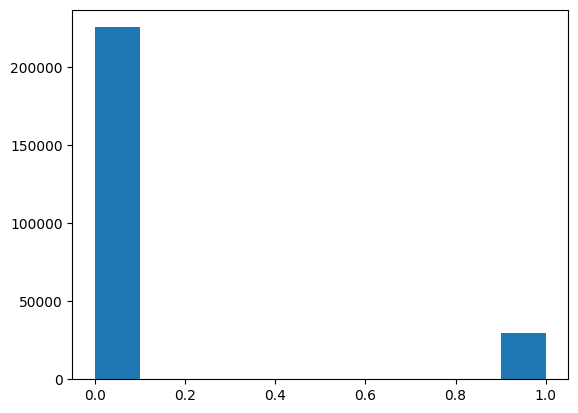

In [87]:
# Display class distribution
print(df['Default'].value_counts())

# Plot class distribution
plt.hist(df['Default'])
plt.show()

In [92]:
y = df['Default']
X = df.drop(columns=['Default'])

# Rescale numerical columns
scaler = StandardScaler()
numerical_columns = X.select_dtypes(['float64', 'int64']).columns
X[numerical_columns] = scaler.fit_transform(X[numerical_columns])

# OneHotEncoder
numerical_columns = X.select_dtypes(['float64', 'int64']).columns
categorical_columns = X.select_dtypes('object').columns

preprocessor = ColumnTransformer(
    transformers=[
        ('num', 'passthrough', numerical_columns),
        ('cat', OneHotEncoder(), categorical_columns)
    ]
)   

X = preprocessor.fit_transform(X)

print(X.shape)
print(y.shape)

(255347, 31)
(255347,)


In [93]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2)

model = LogisticRegression()
model.fit(X_train, y_train)

LogisticRegression()

Confusion Matrix
[[45099   124]
 [ 5652   195]]
Accuracy
0.8869003328764441


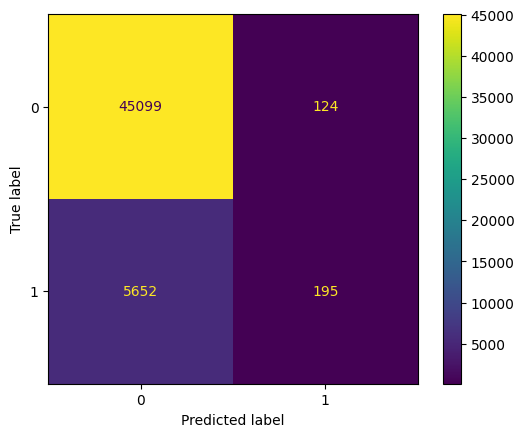

In [100]:
y_pred = model.predict(X_test) 
cm = confusion_matrix(y_test, y_pred)

print("Confusion Matrix")
print(cm)

print("Accuracy")
print((cm[0,0] + cm[1,1]) / np.sum(cm))

disp = ConfusionMatrixDisplay(confusion_matrix=cm)
disp.plot()

Default
0    59306
1    29653
Name: count, dtype: int64


(array([59306.,     0.,     0.,     0.,     0.,     0.,     0.,     0.,
            0., 29653.]),
 array([0. , 0.1, 0.2, 0.3, 0.4, 0.5, 0.6, 0.7, 0.8, 0.9, 1. ]),
 <BarContainer object of 10 artists>)

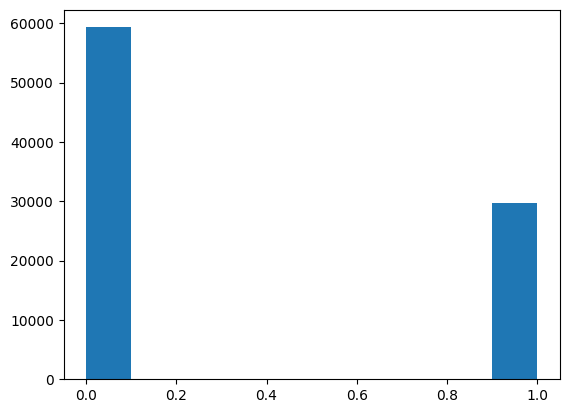

In [102]:
df_majority = df[df['Default'] == 0]
df_minority = df[df['Default'] == 1]

downsample_factor = 2

df_majority_downsampled = df_majority.sample(n=2*len(df_minority))
df_downsampled = pd.concat([df_majority_downsampled, df_minority])

print(df_downsampled['Default'].value_counts())

plt.hist(df_downsampled['Default'])


Confusion Matrix
[[10546  1419]
 [ 3430  2397]]
Accuracy
0.7274617805755396


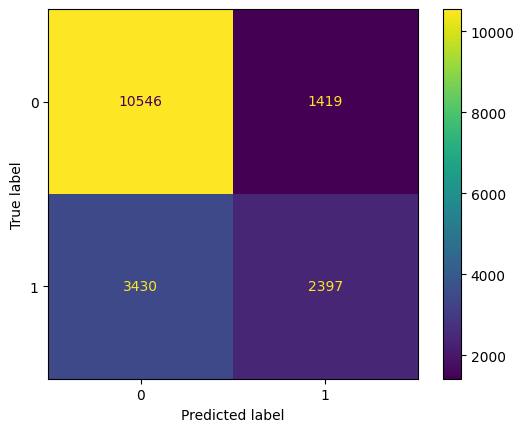

In [104]:
X2 = df_downsampled.drop(columns=['Default'])
y2 = df_downsampled['Default']

X2[numerical_columns] = scaler.fit_transform(X2[numerical_columns])
X2 = preprocessor.fit_transform(X2)

X_train2, X_test2, y_train2, y_test2 = train_test_split(X2, y2, test_size=0.2)

model2 = LogisticRegression()
model2.fit(X_train2, y_train2)

y_pred2 = model2.predict(X_test2)
cm2 = confusion_matrix(y_test2, y_pred2)

print("Confusion Matrix")
print(cm2)

print("Accuracy")
print((cm2[0,0] + cm2[1,1]) / np.sum(cm2))

disp2 = ConfusionMatrixDisplay(confusion_matrix=cm2)
disp2.plot()



In [105]:
import xgboost as xgb

In [106]:
model = xgb.XGBClassifier(use_label_encoder=False, objective='binary:logistic', nthread=4, tree_method='hist')
model.fit(X_train, y_train)

C:\Users\hvutr\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.11_qbz5n2kfra8p0\LocalCache\local-packages\Python311\site-packages\xgboost\data.py:520: FutureWarning: is_sparse is deprecated and will be removed in a future version. Check `isinstance(dtype, pd.SparseDtype)` instead.
  if is_sparse(data):


XGBClassifier(base_score=None, booster=None, callbacks=None,
              colsample_bylevel=None, colsample_bynode=None,
              colsample_bytree=None, device=None, early_stopping_rounds=None,
              enable_categorical=False, eval_metric=None, feature_types=None,
              gamma=None, grow_policy=None, importance_type=None,
              interaction_constraints=None, learning_rate=None, max_bin=None,
              max_cat_threshold=None, max_cat_to_onehot=None,
              max_delta_step=None, max_depth=None, max_leaves=None,
              min_child_weight=None, missing=nan, monotone_constraints=None,
              multi_strategy=None, n_estimators=None, n_jobs=None, nthread=4,
              num_parallel_tree=None, ...)

Confusion Matrix
[[44788   435]
 [ 5374   473]]
Accuracy
0.8862541609555512


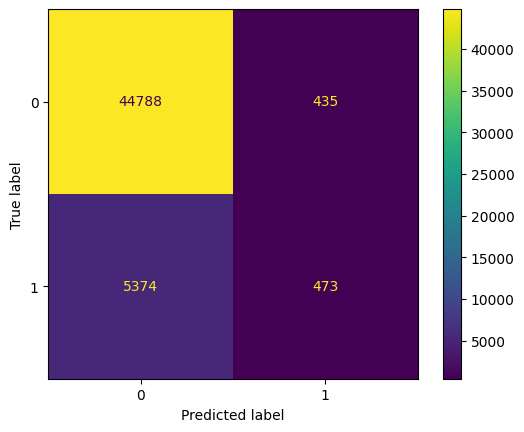

In [108]:
y_pred_xgb = model.predict(X_test)
cm = confusion_matrix(y_test, y_pred_xgb)

print("Confusion Matrix")
print(cm)

print("Accuracy")
print((cm[0,0] + cm[1,1]) / cm.sum())

disp = ConfusionMatrixDisplay(confusion_matrix=cm)
disp.plot()




C:\Users\hvutr\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.11_qbz5n2kfra8p0\LocalCache\local-packages\Python311\site-packages\xgboost\data.py:520: FutureWarning: is_sparse is deprecated and will be removed in a future version. Check `isinstance(dtype, pd.SparseDtype)` instead.
  if is_sparse(data):


Confusion Matrix
[[10310  1655]
 [ 3319  2508]]
Accuracy
0.7204361510791367


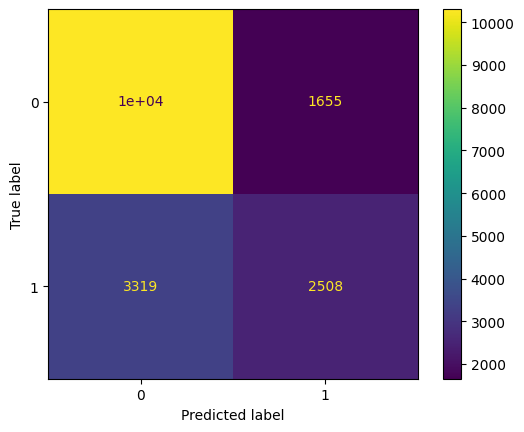

In [111]:
model2 = xgb.XGBClassifier(use_label_encoder=False, objective='binary:logistic', nthread=4, tree_method='hist')

model2.fit(X_train2, y_train2)

y_pred_xgb2 = model2.predict(X_test2)
cm2 = confusion_matrix(y_test2, y_pred_xgb2)

print("Confusion Matrix")
print(cm2)

print("Accuracy")
print((cm2[0,0] + cm2[1,1]) / cm2.sum())

disp2 = ConfusionMatrixDisplay(confusion_matrix=cm2)
disp2.plot()